## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('PDataset4.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#print(X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 71)

# Calling the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 71)

In [30]:
print(X)

[[0.0 1.0 0.5 1.0]
 [0.0 1.0 0.5 1.5]
 [0.0 1.0 0.5 2.5]
 ...
 [1.0 0.0 25.0 2.5]
 [1.0 0.0 25.0 3.5]
 [1.0 0.0 25.0 4.5]]


## Applying Grid Search to find the best model and the best parameters

In [2]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 132 candidates, totalling 660 fits
Best Accuracy: 0.9708334258632048
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [20]:
results_df = pd.DataFrame(grid_search.cv_results_)

from pathlib import Path
filepath1 = Path.cwd().parent
filepath2 = Path(filepath1/'Results/1D_DT_Hyperparameter/dt_hyperparameter.csv')  
filepath2.parent.mkdir(parents=True, exist_ok=True)
results_df.to_csv(filepath2)

## Training the Decision Tree Regression model on the Training set

In [3]:
regressor = DecisionTreeRegressor(max_depth = 7,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  random_state = 71)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=71)

## Create a KFold object with 5 splits 

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

[0.98837263 0.95440015 0.99227168 0.95809708 0.96102559]
0.9708334258632048


DecisionTreeRegressor(max_depth=7, random_state=71)

## Predicting the Test set results

In [5]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 119.69  117.57]
 [1085.86  949.31]
 [ 179.66  200.22]
 [ 268.07  219.42]
 [ 115.69  112.12]
 [1784.86 1447.06]
 [ 146.7   150.68]
 [ 146.7   157.24]
 [ 107.27  109.06]
 [ 679.05  724.54]
 [ 309.78  417.99]
 [ 119.69  118.26]
 [ 212.58  195.43]
 [1038.81 1113.99]
 [ 107.27  114.48]
 [ 119.69  115.74]
 [ 115.69  115.79]
 [ 179.66  197.38]
 [ 119.69  117.61]
 [ 115.69  109.28]
 [ 585.96  626.02]
 [1267.01 1196.18]
 [ 107.27  110.56]
 [ 131.99  130.94]
 [ 107.27  112.99]
 [ 171.61  148.55]
 [ 119.69  119.54]
 [ 234.47  230.67]
 [ 115.1   116.75]
 [ 131.99  126.05]
 [ 107.27  104.27]
 [3628.84 3327.9 ]
 [ 131.99  124.15]
 [ 175.25  171.84]
 [2529.34 2259.19]
 [ 131.99  123.17]
 [3657.31 4232.15]
 [ 157.08  167.83]
 [ 131.99  134.7 ]
 [ 119.69  114.12]
 [ 309.78  397.25]
 [ 309.78  324.37]
 [1459.01 1550.45]
 [ 425.24  403.13]
 [ 130.86  130.95]
 [ 119.69  120.33]
 [ 118.53  132.34]
 [ 115.69  113.93]
 [ 234.47  261.17]
 [ 171.61  193.11]
 [ 131.99  137.57]
 [ 179.66  203.69]
 [ 119.69  1

## Evaluating the Model Performance

### R2

In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9856309457425527


### Adj R2

In [7]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.985296781690054


### RMSE

In [8]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

153.99430087235152

### MAE

In [9]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

57.5224593421471

## Visualize

Text(0, 0.5, 'Predicted data')

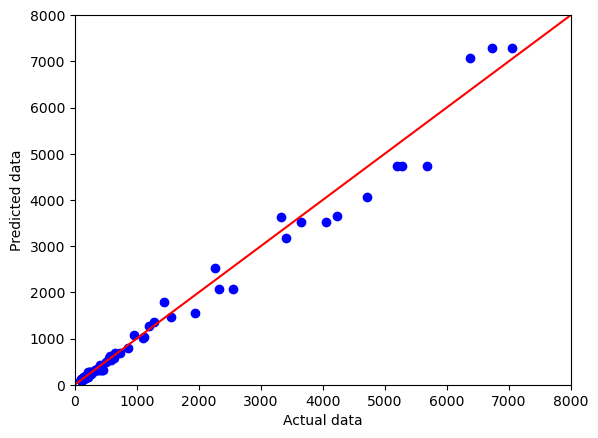

In [11]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,8000],[0,8000], color = "red")
plt.axis ([0,8000,0,8000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

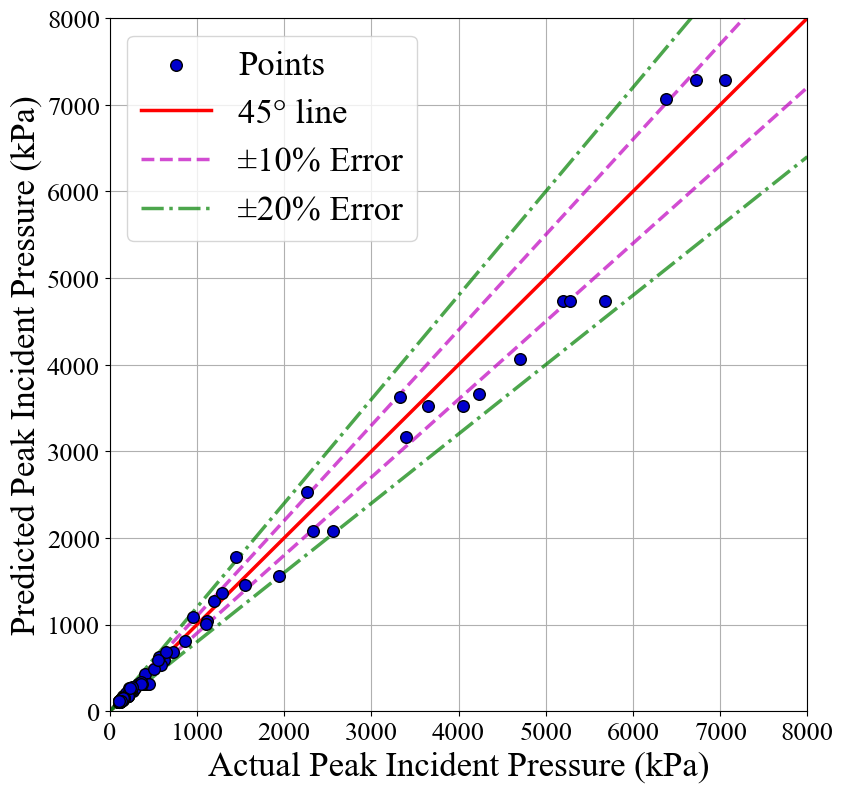

In [32]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,8000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000)
plt.xlim(0, 8000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax.annotate("Adj.R$^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('Images/plotD1.png', dpi = 600, bbox_inches = 'tight')

## Error margins

In [16]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 80.79%
Within 20% margin 96.61%
Out of 20% margin 3.39%


## <500 kPa

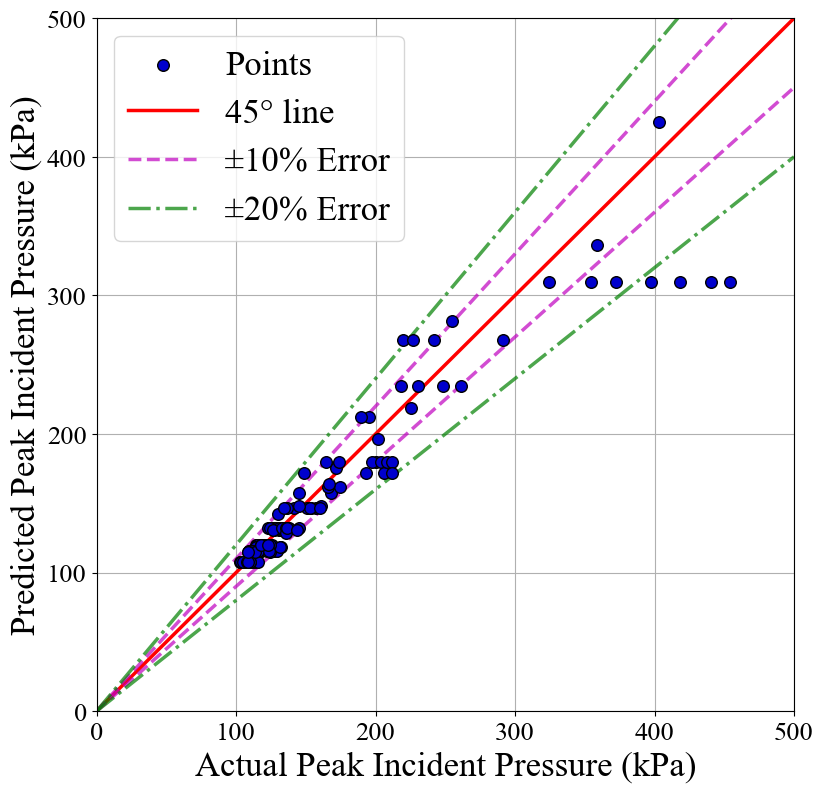

In [22]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x2 = np.linspace(0,500)

plt.plot(x2, x2, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x2, 1.1*x2, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x2, 0.9*x2,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x2, 1.2*x2, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x2, 0.8*x2,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (5000, 2000),fontsize = 25)  #Model is called here

plt.savefig('Images/plotD2.png', dpi = 600, bbox_inches = 'tight')

## Save the model to disk

In [21]:
import pickle
filename = 'finalized_model_DT.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Make new predictions

In [ ]:
%%timeit -r 1 -n 1
comp_data = pd.read_excel('ForPaperComparison.xlsx')
print (comp_data)
#comp_data = np.array(ct.fit_transform(comp_data))
#print (comp_data)
comp_data_pred = regressor.predict(comp_data)
print (comp_data_pred)

## Visualise Decision Tree

In [31]:
import graphviz
from sklearn.tree import export_graphviz
# DOT data
features = ['Explosive type-Composition B', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']
dot_data = export_graphviz(regressor,
                           max_depth = 3,
                           out_file=None,
                           feature_names=features,
                           label = 'all',
                           class_names=None,
                           rounded=True,
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [29]:
print (X_train

array([[1.0, 0.0, 17.0, 9.5],
       [1.0, 0.0, 7.5, 12.5],
       [1.0, 0.0, 15.5, 15.5],
       ...,
       [0.0, 1.0, 3.5, 13.5],
       [0.0, 1.0, 0.5, 11.5],
       [0.0, 1.0, 9.5, 2.5]], dtype=object)